In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

In [2]:
G = 6.674e-11 #forceVector function from Homework D
def separation(r_i, r_j): #helper functions for the force vector function
    return np.array(r_j) - np.array(r_i)

def magnitude(v): #magnitude of the vector function
   return np.sqrt(np.sum(v**2))

def unit(v): #unit vector function
    mag = magnitude(v)
    if mag == 0:
        return np.array([0.0, 0.0, 0.0])
    return v / mag

def force_magnitude(m_i, m_j, r): #magnitude of the force function
    return G * m_i * m_j / r**2

def forceVector(m_i, m_j, r_i, r_j): 
    r_vector = separation(r_i, r_j)
    r_magnitude = magnitude(r_vector)

    F_magnitude = force_magnitude(m_i, m_j, r_magnitude)
    F_unit = unit(r_vector)
    
    return F_magnitude * F_unit

In [3]:
def calculateforceVectors(masses, positions): #Calculating force vectors given a list of inputs
    N = len(masses)
    forces = np.zeros((N, 3))
    for i in range(N):
        for j in range(N):
            if i != j:
                forces[i] += forceVector(masses[i], masses[j],
                                         positions[i], positions[j])
    return forces

In [4]:
masses = np.array([1.0, 1.0]) # test function for the force vector 
positions = np.array([ [-1,0,0],[ 1,0,0]])
print(calculateforceVectors(masses, positions))

[[ 1.6685e-11  0.0000e+00  0.0000e+00]
 [-1.6685e-11  0.0000e+00  0.0000e+00]]


Because I chose my vectors to have magnitude 1, I expected the force to have a magnitude of G, which it did. 

In [5]:
sys.path.append('/home/jdarling/astr2600/nbody/code/')

In [6]:
from leapfrog import updateParticles

In [7]:
help(updateParticles)

Help on function updateParticles in module leapfrog:

updateParticles(masses, positions, velocities, dt)
    Evolve particles in time via leap-frog integrator scheme. This function
    takes masses, positions, velocities, and a time step dt as
    
    Parameters
    ----------
    masses : np.ndarray
        1-D array containing masses for all particles, in kg
        It has length N, where N is the number of particles.
    positions : np.ndarray
        2-D array containing (x, y, z) positions for all particles.
        Shape is (N, 3) where N is the number of particles.
    velocities : np.ndarray
        2-D array containing (x, y, z) velocities for all particles.
        Shape is (N, 3) where N is the number of particles.
    dt : float
        Evolve system for time dt (in seconds).
    
    Returns
    -------
    Updated particle positions and particle velocities, each being a 2-D
    array with shape (N, 3), where N is the number of particles.



In [8]:
masses = np.array([1.0])
positions = np.array([[0.0,0.0,0.0]])
velocities = np.array([[1.0,0.0,0.0]])
dt = 1
new_pos, new_v = updateParticles(masses, positions, velocities, dt)
print('New position of the particle is', new_pos)
print('New velocity of the particle is', new_v)

New position of the particle is [[1. 0. 0.]]
New velocity of the particle is [[1. 0. 0.]]


We expect the velocity to remain constant but due to the time step and the updateParticles function that we called we expect that the position will update by the time step which in this case we have assigned it a value of 1, so we can expect the position to update by 1. 

In [9]:
def calculateTrajectories(masses, i_pos, i_vel, total_time, dt):
    '''
    This function evolves a system over a given period of time using the UpdateParticles function. More specifically, 
    it will update N particles positions and velocity through time as they interact with gravity. It will store each updated 
    position and velocity in an array and return them with each updated time. 

    Parameters
    ------
    m: masses of N particles in kg - 1D array
    i_pos: initial position of each particle in meters- 2D array
    i_vel: initial velocity of each particle - 2D array in m/s (Vx, Vy, Vz)
    total_time: total time of the simulation in seconds
    dt: time step (float) in seconds

    Returns
    ------
    times: 1D array of times ranging from 0 to total_time
    positions: 3D array of each updated position for each particle at every time step, (Ntimes, Nparticles, 3)
    velocities: 3D array of each updated velocity for each particle at every time step, (Ntimes, Nparticles, 3)

    '''

    n_steps = int(total_time / dt) #define the number of steps
    n_times = n_steps + 1 #define the number of times recorded
    times = np.linspace(0, total_time, n_times)
    
    n_particles = i_pos.shape[0] #gives us the number of particles by returning the number of rows of the array
    
    positions = np.zeros((n_times, n_particles, 3))
    velocities = np.zeros((n_times, n_particles, 3)) #creates a 3D array of velocities and positions 
    
    positions[0] = i_pos
    velocities[0] = i_vel #these 2 lines store the intiial conditions at an index of 0

    current_pos = i_pos #create pos at current time
    current_vel = i_vel #create vel at current time

    for step in range(1, n_times): #loop from the first time step to the last time step of n_times
        new_pos, new_vel = updateParticles(masses, current_pos, current_vel, dt)
        positions[step] = new_pos #after taking a step record new position and velocity
        velocities[step] = new_vel
        current_pos = new_pos #update and store current velocities and positions after each step
        current_vel = new_vel

    return times, positions, velocities

In [10]:
sun_x = (-3e-6)*(1.49e11) #conversion from AU to m
print(sun_x)
earth_x = (0.999997)*(1.49e11) #conversion to m 
print(earth_x)

-447000.0
148999553000.0


In [11]:
m_sun = 1.989e30 #kg
m_earth = 5.972e24 #kg
masses = np.array([m_sun, m_earth]) #create an array for the masses
positions_i = np.array([[sun_x, 0, 0], [earth_x, 0, 0]]) #positions array
velocities_i = np.array([[0, -8.94e-2, 0], [0, 2.98e4, 0]]) #velocity array
total_time = (1000)*24*60*60 #conversion of days to seconds
dt = 8640 #seconds
times, positions, velocities = calculateTrajectories(masses, positions_i, velocities_i, total_time, dt)

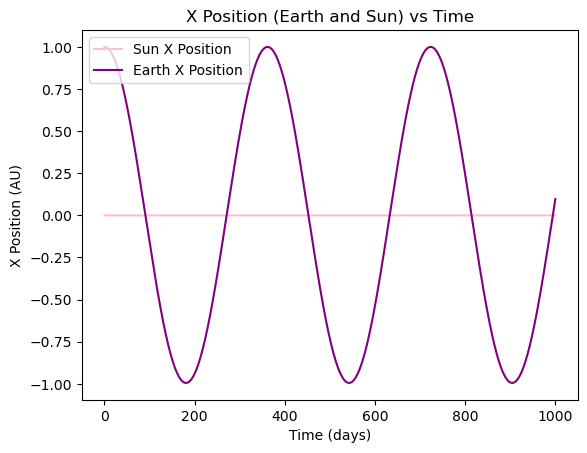

In [12]:
AU  = 1.49e11 #meters
day = 24*60*60
times_days = times/day #convert times back to days
positions_AU = positions/AU #convert positions back to AU
sun_x_AU   = positions_AU[:, 0, 0] #these two lines will extract the sun and earths x position at all times
earth_x_AU = positions_AU[:, 1, 0]
plt.figure()
plt.plot(times_days, sun_x_AU, label = "Sun X Position", color = 'pink')
plt.plot(times_days, earth_x_AU, label = "Earth X Position", color = 'purple')
plt.xlabel("Time (days)")
plt.ylabel("X Position (AU)")
plt.title("X Position (Earth and Sun) vs Time")
plt.legend()
plt.show()

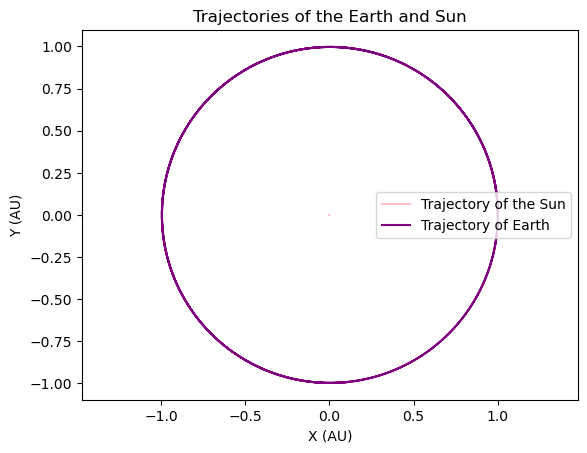

In [13]:
sun_x_AU   = positions_AU[:, 0, 0] #these lines will extract the sun and earths x and y position at all times
earth_x_AU = positions_AU[:, 1, 0]
sun_y_AU = positions_AU[:, 0, 1]
earth_y_AU = positions_AU[:, 1, 1]
plt.figure()
plt.plot(sun_x_AU, sun_y_AU, label = "Trajectory of the Sun", color = 'pink')
plt.plot(earth_x_AU, earth_y_AU, label = "Trajectory of Earth", color = 'purple')
plt.xlabel("X (AU)")
plt.ylabel("Y (AU)")
plt.title("Trajectories of the Earth and Sun")
plt.axis("equal")
plt.legend()
plt.show() 

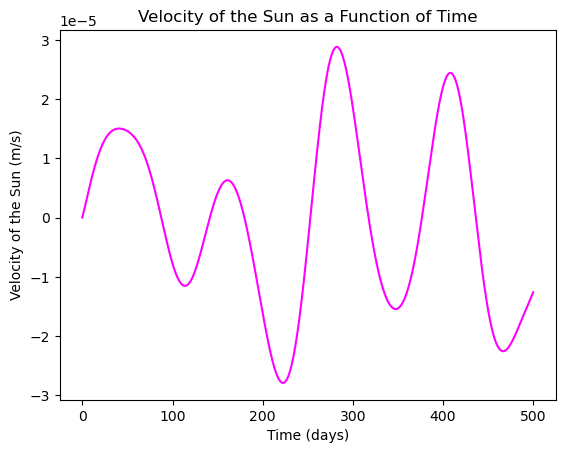

In [96]:
vx_sun = velocities[:, 0, 0]
plt.figure()
plt.plot(times_days, vx_sun, color = 'magenta')
plt.xlabel("Time (days)")
plt.ylabel("Velocity of the Sun (m/s)")
plt.title("Velocity of the Sun as a Function of Time")
plt.show()

Based off of the plot above I would estimate that the precision with which we would need to measure the orbital velocity of a sun like star to see an earth like planet orbiting it would be around 0.95m/s. I got this from looking at the amplitude of the graph and estimating that value. 

In [15]:
m_sun = 1.989e30 #kg
m_earth = 5.972e24 #kg
masses = np.array([m_sun, m_earth]) #create an array for the masses
positions_i = np.array([[sun_x, 0, 0], [earth_x, 0, 0]]) #positions array
velocities_i = np.array([[0, (-8.94e-2)/2, 0], [0, (2.98e4)/2, 0]]) #velocity array but at half the values 
total_time = (1000)*24*60*60 #conversion of days to seconds
dt = 8640 #seconds
times, positions, velocities = calculateTrajectories(masses, positions_i, velocities_i, total_time, dt)

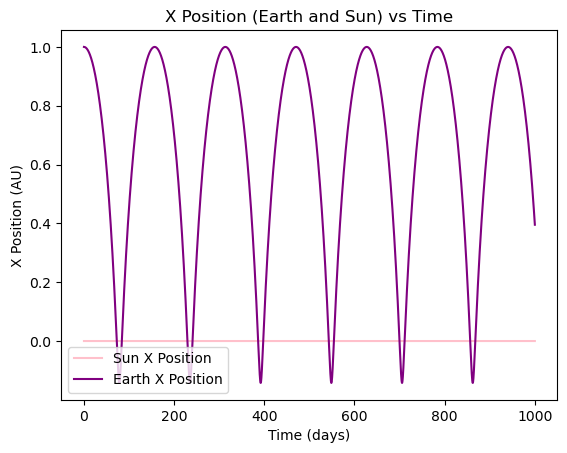

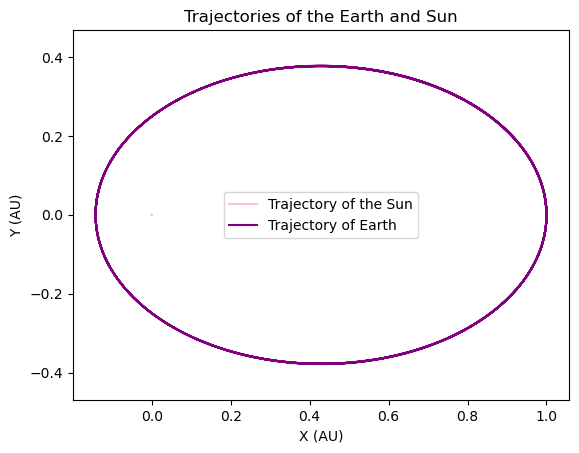

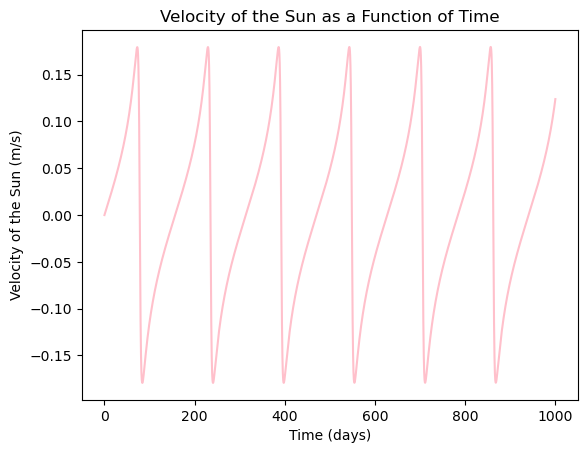

In [16]:
#Plot 1
AU  = 1.49e11 #meters
day = 24*60*60
times_days = times/day #convert times back to days
positions_AU = positions/AU #convert positions back to AU
sun_x_AU   = positions_AU[:, 0, 0] #these two lines will extract the sun and earths x position at all times
earth_x_AU = positions_AU[:, 1, 0]
plt.figure()
plt.plot(times_days, sun_x_AU, label = "Sun X Position", color = 'pink')
plt.plot(times_days, earth_x_AU, label = "Earth X Position", color = 'purple')
plt.xlabel("Time (days)")
plt.ylabel("X Position (AU)")
plt.title("X Position (Earth and Sun) vs Time")
plt.legend()
plt.show()

#plot 2
sun_x_AU   = positions_AU[:, 0, 0] #these two lines will extract the sun and earths x position at all times
earth_x_AU = positions_AU[:, 1, 0]
sun_y_AU = positions_AU[:, 0, 1]
earth_y_AU = positions_AU[:, 1, 1]
plt.figure()
plt.plot(sun_x_AU, sun_y_AU, label = "Trajectory of the Sun", color = 'pink')
plt.plot(earth_x_AU, earth_y_AU, label = "Trajectory of Earth", color = 'purple')
plt.xlabel("X (AU)")
plt.ylabel("Y (AU)")
plt.title("Trajectories of the Earth and Sun")
plt.axis("equal")
plt.legend()
plt.show()

#plot 3
vx_sun = velocities[:, 0, 0]
plt.figure()
plt.plot(times_days, vx_sun, color = 'pink')
plt.xlabel("Time (days)")
plt.ylabel("Velocity of the Sun (m/s)")
plt.title("Velocity of the Sun as a Function of Time")
plt.show()

Earths orbit will change drastically and become a much more elliptical orbit as shown in the second graph. This also means its aphelion will be greater than 1 AU and its perihelion will be closer than 1 AU as shown in the first graph. 

In [17]:
i_conditions = np.loadtxt("/home/jdarling/astr2600/nbody/initialconditions/kepler16.txt")
!head /home/jdarling/astr2600/nbody/initialconditions/kepler16.txt

# mass (kg)   x (m)       y (m)       z (m)       vx (m/s)    vy (m/s)    vz (m/s)    
+1.3718e+30 +7.6349e+09 -9.6587e+05 +1.8447e+09 -1.0502e+03 -6.8224e+00 +1.3030e+04
+4.0287e+29 -2.5998e+10 +3.2889e+06 -6.2813e+09 +3.5760e+03 +2.3231e+01 -4.4368e+04
+6.3250e+26 +3.7761e+10 -4.0923e+07 +8.1934e+10 -3.6298e+04 -1.0812e+01 +1.7020e+04


In [18]:
masses = i_conditions[:,0] #extract the data from the table above
positions = i_conditions[:, 1:4] 
velocities = i_conditions[:, 4:7]
positions_AU = positions/AU #convert to AU
AU_x = positions_AU[:, 0]
AU_z = positions_AU[:, 2]
vel_x = velocities[:, 0]
vel_z = velocities[:, 2]

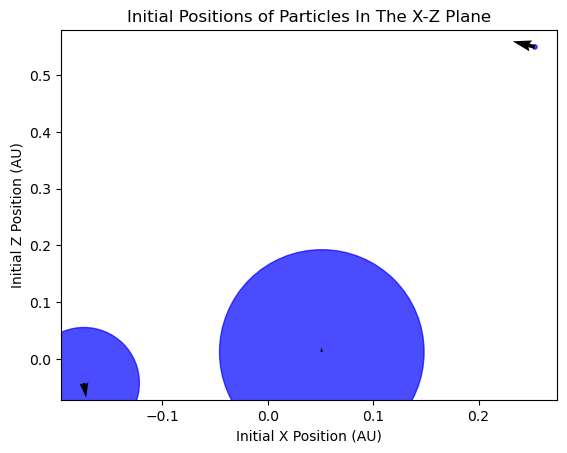

In [19]:
sizes = 10*(masses/masses.min()) #scaling the masses 
Vx_AU_per_Day = vel_x*day/AU
Vz_AU_per_Day = vel_z*day/AU #these convert days to AU per day so it fits with the graph
plt.figure()
plt.scatter(AU_x, AU_z, color = 'blue', s = sizes, alpha = 0.7)
plt.quiver(AU_x, AU_z, Vx_AU_per_Day, Vz_AU_per_Day, scale_units = "xy", angles = "xy", scale =1.0) 
#angles and scale units part ensures that the length and direction of vectors are correct
plt.xlabel("Initial X Position (AU)")
plt.ylabel("Initial Z Position (AU)")
plt.title("Initial Positions of Particles In The X-Z Plane")
plt.show()

In [44]:
masses = i_conditions[:,0] #create an array for the masses
positions_i = i_conditions[:, 1:4]
velocities_i = i_conditions[:, 4:7] 
total_time = 500*24*60*60 #conversion from days to seconds
dt = 0.5*24*60*60 #seconds
times, positions, velocities = calculateTrajectories(masses, positions_i, velocities_i, total_time, dt)

days = 24*60*60 #days in seconds
AU = 1.496e11 #m
times_days = times/days
positions_AU = positions/AU

import matplotlib.animation as ani

from mpl_toolkits import mplot3d

FFMpegWriter = ani.writers['ffmpeg']
writer = FFMpegWriter(fps=10)

fig = plt.figure(figsize=(5,5))
fig.patch.set_alpha(1.0)
ax = plt.axes(projection='3d')
ax.view_init(45, 75)

sizes = 5 * (masses / masses.min()) #scale the masses 

with writer.saving(fig, "Kepler-16ABb_3D.mp4", 100): #create animation
    for i in range(0,len(times),10):
        ax.cla()
        x = positions_AU[i, :, 0]
        y = positions_AU[i, :, 1]
        z = [times_days[i]] * len(x) 
        
        ax.scatter(x, y, z, s=sizes, c=['pink','purple','blue'])

        ax.set_xlabel('x (AU)')
        ax.set_ylabel('y (AU)')
        ax.set_zlabel('Time (Days)')
        ax.set_title(f'Kepler-16ABb Circumbinary System: Day {times_days[i]:.1f}')

        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_zlim(0, 500)
        
        if i % 500 == 0:
            print(f"saving movie frame for time step {i}")        
        writer.grab_frame()
plt.close(fig) #gets rid of the extra plot
from IPython.display import Video
Video("Kepler-16ABb_3D.mp4", embed=True)

saving movie frame for time step 0
saving movie frame for time step 500
saving movie frame for time step 1000


In [49]:
my_adventure = np.loadtxt("/home/jdarling/astr2600/nbody/initialconditions/planetesimalDisk.txt")
!head /home/jdarling/astr2600/nbody/initialconditions/planetesimalDisk.txt #load in the data 

# mass (kg)   x (m)       y (m)       z (m)       vx (m/s)    vy (m/s)    vz (m/s)    
+1.9890e+30 -0.0000e+00 +0.0000e+00 -0.0000e+00 -0.0000e+00 -0.0000e+00 +0.0000e+00
+1.9890e+20 -9.8471e+10 +1.9358e+10 -0.0000e+00 -7.0155e+03 -3.5687e+04 +1.4760e+03
+1.9890e+20 +9.2346e+09 +1.0289e+11 -0.0000e+00 -3.5704e+04 +3.2046e+03 -1.1354e+02
+1.9890e+20 +6.1308e+10 -9.1514e+10 +0.0000e+00 +2.8841e+04 +1.9321e+04 +1.1089e+03
+1.9890e+20 -5.5122e+10 -1.1849e+11 +0.0000e+00 +2.8897e+04 -1.3443e+04 -3.2428e+02
+1.9890e+20 -9.7365e+09 -4.8895e+10 +0.0000e+00 +5.0608e+04 -1.0078e+04 +5.7392e+02
+1.9890e+20 +6.9612e+10 +9.7390e+10 -0.0000e+00 -2.7091e+04 +1.9364e+04 -3.5236e+02
+1.9890e+20 -1.2054e+10 +7.5797e+10 -0.0000e+00 -4.1073e+04 -6.5318e+03 +1.3317e+03
+1.9890e+20 -4.4645e+10 -9.2515e+10 -0.0000e+00 +3.2376e+04 -1.5624e+04 -2.0415e+03


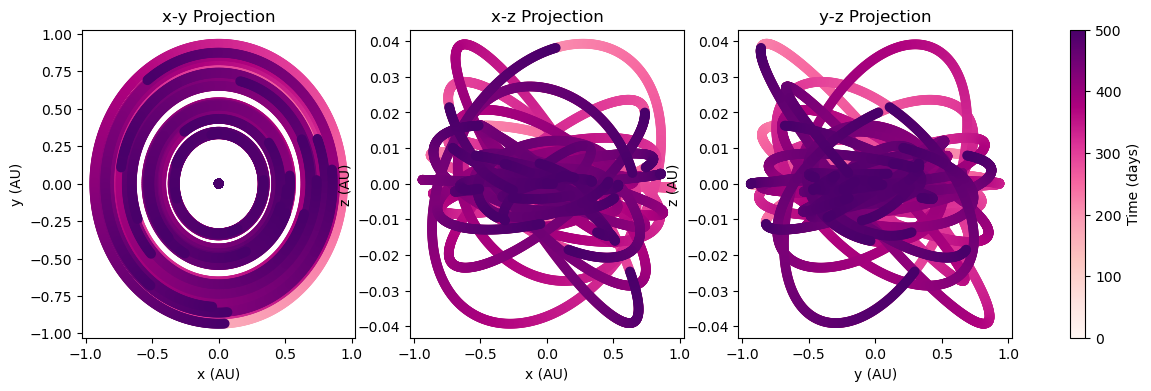

In [97]:
n_times, n_bodies, _ = positions_AU.shape

x = positions_AU[:, :, 0].reshape(-1) #turn x, y, z into 1D arrays
y = positions_AU[:, :, 1].reshape(-1)
z = positions_AU[:, :, 2].reshape(-1)

t_all = []
for t in times_days: #this is so the length of this array matches the positions
    for b in range(n_bodies):
        t_all.append(t)
t_all = np.array(t_all)

#creating side by side plots for each projection
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  
ax_xy, ax_xz, ax_yz = axes

#x_y projection
sc_xy = ax_xy.scatter(x, y, c = t_all, cmap = 'RdPu')
ax_xy.set_xlabel("x (AU)")
ax_xy.set_ylabel("y (AU)")
ax_xy.set_title("x-y Projection")

#x_z projection
sc_xz = ax_xz.scatter(x, z, c = t_all, cmap = 'RdPu')
ax_xz.set_xlabel("x (AU)")
ax_xz.set_ylabel("z (AU)")
ax_xz.set_title("x-z Projection")

#y_z projection
sc_yz = ax_yz.scatter(y, z, c = t_all, cmap = 'RdPu')
ax_yz.set_xlabel("y (AU)")
ax_yz.set_ylabel("z (AU)")
ax_yz.set_title("y-z Projection")

color_bar = fig.colorbar(sc_xy, ax=axes) #show time as the fourth dimension represented by a color bar
color_bar.set_label ("Time (days)")

plt.show()